# Linear Regression Models
## Project 2nd Unit
### by Alejandro Puerto Castro

# 1. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

## 2. Loading the data

In [2]:
forest = pd.read_csv('forestfires.csv', sep = ',')

In [3]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# Searching missing values
print(forest.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [5]:
forest.shape

(517, 13)

In [6]:
# Copy the data into another variable to not modify the original data set.
forest_df = forest.copy()

In [7]:
forest_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [8]:
#Encoding the data. Replacing nominal values to number
forest_df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [9]:
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
forest_df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## 3. Exploratory Data Analysis

## Correlation Matrix

In [11]:
corr_matrix = forest_df.corr()

In [12]:
corr_matrix.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122


In [13]:
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True]
 [False False False  True  True  True  True  True  True  True  True  True
   True]
 [False False False False  True  True  True  True  True  True  True  True
   True]
 [False False False False False  True  True  True  True  True  True  True
   True]
 [False False False False False False  True  True  True  True  True  True
   True]
 [False False False False False False False  True  True  True  True  True
   True]
 [False False False False False False False False  True  True  True  True
   True]
 [False False False False False False False False False  True  True  True
   True]
 [False False False False False False False False False False  True  True
   True]
 [False False False False False False False False False False False  True
   True]
 [Fa

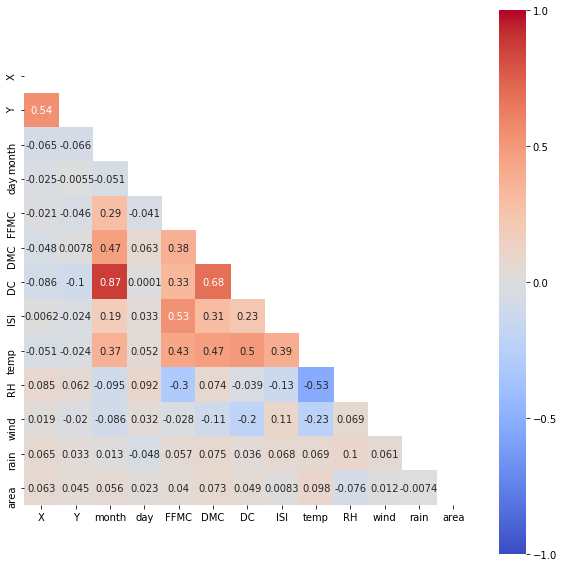

In [14]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True, 
                      annot_kws = {'size': 10})

plt.show()

We can notice that temp has a positive high correlation to the area burnt, following is RH with negative correlation and DMC. Rain has the least correlation.

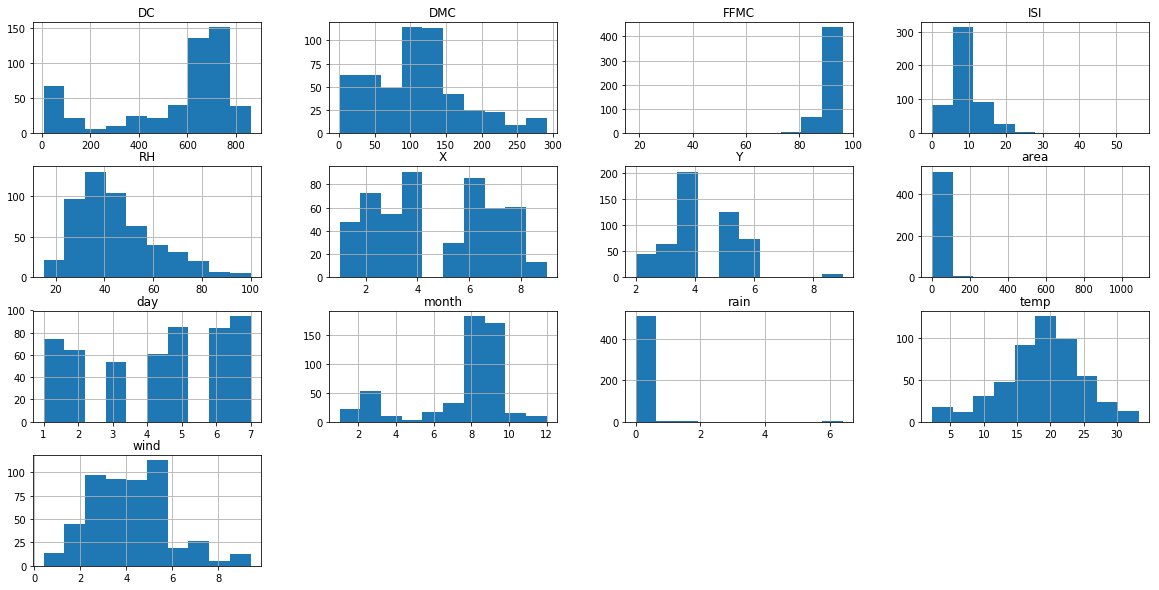

In [15]:
forest_df.hist(figsize=(20,10))
plt.show()

## 4. Detecting outliers

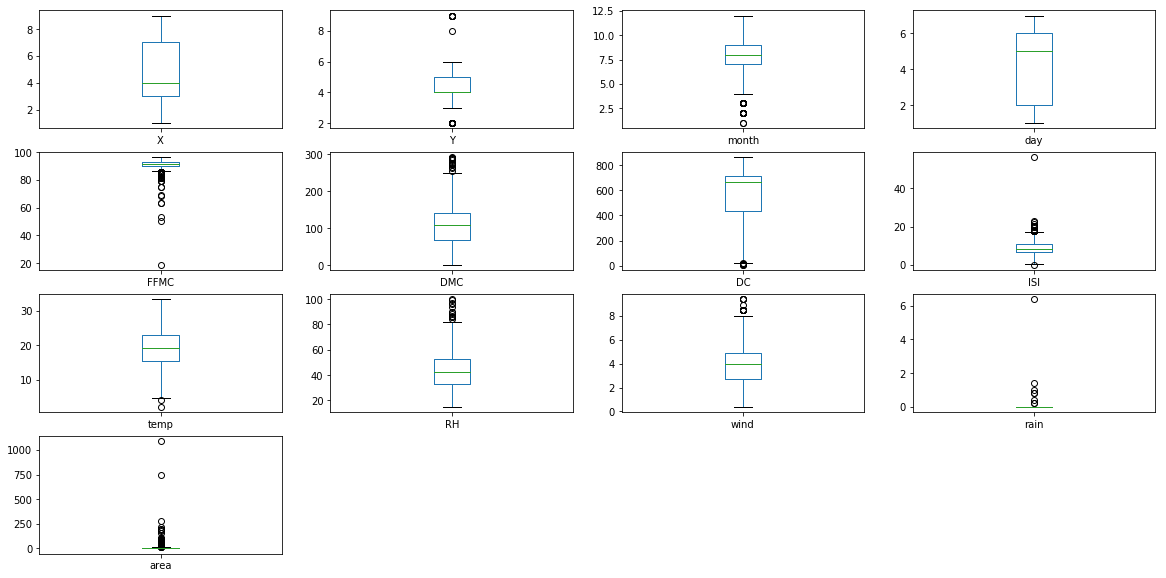

In [16]:
forest_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,10)) 
plt.show()

## Z-Score outlier detection

In [17]:
# Remove outliers
z = np.abs(stats.zscore(forest_df))
forest_zscore = forest_df[(z < 3).all(axis=1)]
print(forest_zscore.shape)

(486, 13)


The dataset was reduced from 517 to 486 rows.

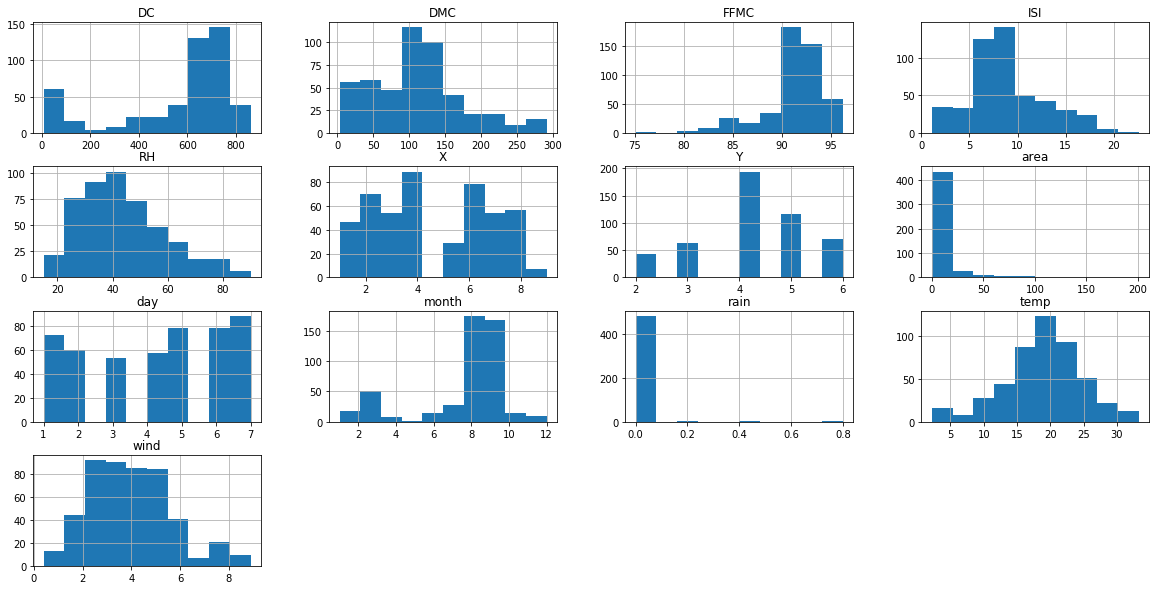

In [18]:
forest_zscore.hist(figsize=(20,10))
plt.show()

In [19]:
corr_matrix = forest_zscore.corr()

In [20]:
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

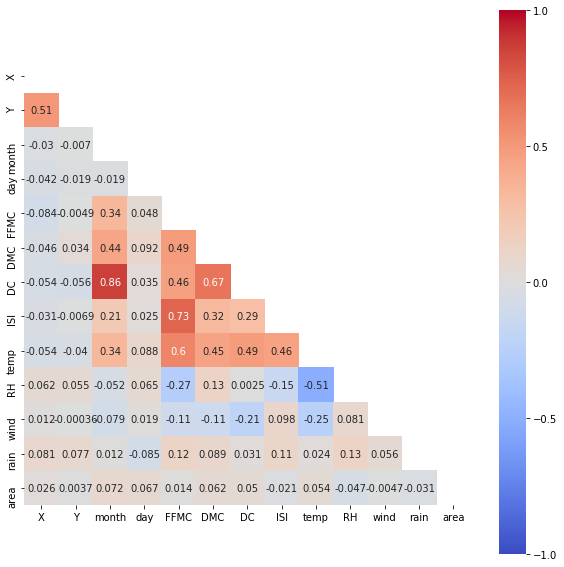

In [21]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True, 
                      annot_kws = {'size': 10})

plt.show()

We can observe that in this outlier detection method, month, day, DMC, and temp have the highest positive correlation to area burnt.

## Inter-Quartile Range outlier detection

In [22]:
# Using IQR (interquartile range) score to display outliers
Q1 = forest_df.quantile(0.25)
Q3 = forest_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X          4.00
Y          1.00
month      2.00
day        4.00
FFMC       2.70
DMC       73.80
DC       276.20
ISI        4.30
temp       7.30
RH        20.00
wind       2.20
rain       0.00
area       6.57
dtype: float64


In [23]:
# Filtering out outliers and keeping only valid values.
forest_iqr = forest_df[~((forest_df < (Q1 - 1.5 * IQR)) |(forest_df > (Q3 + 1.5 * IQR))).any(axis=1)]
forest_iqr.shape

(276, 13)

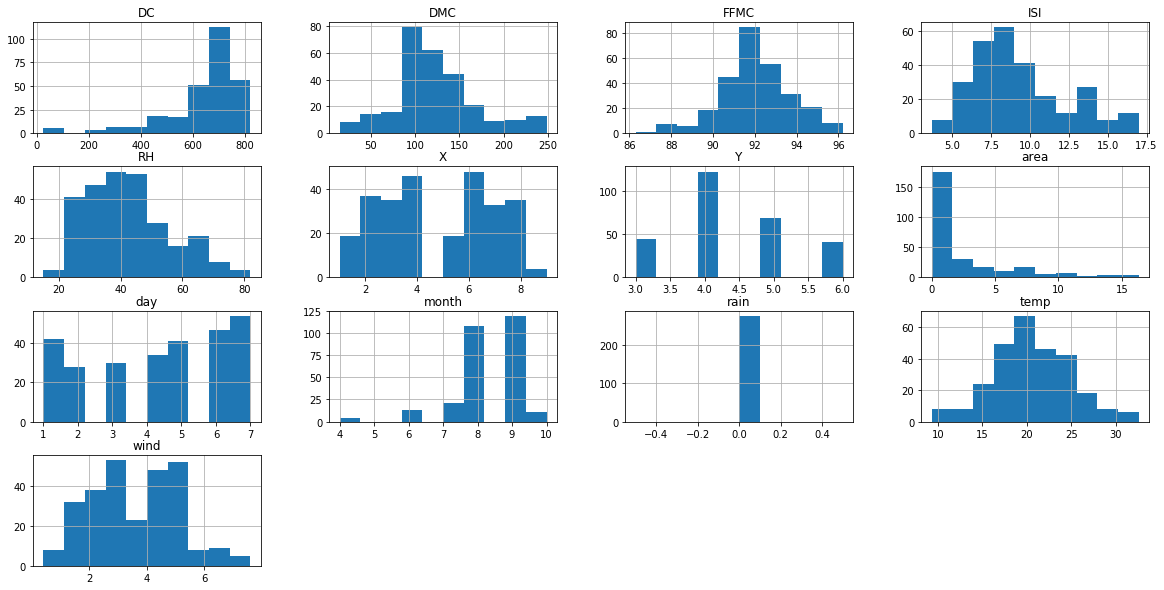

In [24]:
forest_iqr.hist(figsize=(20,10))
plt.show()

In [25]:
corr_matrix = forest_iqr.corr()
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

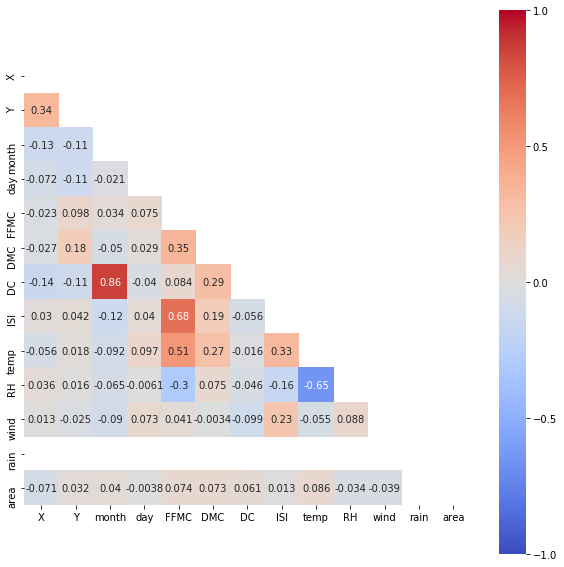

In [26]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True, 
                      annot_kws = {'size': 10})

plt.show()

We can observe that now temp, FFMC, and DMC have the highest positive correlation to area burnt respectively. Also, we can notice that the rain variable has dissapeared, this is because it was not relevant; we can see this from previous analyses.

# 5. Choosing the model

### With outliers

In [27]:
data = forest_df.values
x = data[:, 0:12]
y = data[:, 12]

In [28]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

In [29]:
for name, model in models:
    # Fit the model
    model.fit(x, y)
    
    predictions = model.predict(x)
    
    # Evaluate the model
    score = explained_variance_score(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    
    msg = "%s: %.2f R2 / %.2f RMSE" % (name, score, rmse)
    print(msg)

Linear Regression: 0.02 R2 / 62.83 RMSE
Ridge: 0.02 R2 / 62.83 RMSE
Lasso: 0.02 R2 / 62.85 RMSE
ElasticNet: 0.02 R2 / 62.85 RMSE


## Evaluating with Cross Validation

In [30]:
kfold = KFold(n_splits=5, random_state=0)

for name, model in models:
    score = cross_val_score(model, x, y, cv=kfold)    
    kf_predictions = cross_val_predict(model, x, y, cv=kfold)
    rmse_cv = np.sqrt(mean_squared_error(y, kf_predictions))
    print("%s: %.2f R2 / (%.2f)RMSE" % (name, score.mean(), rmse_cv))

Linear Regression: -1.88 R2 / (64.61)RMSE
Ridge: -1.87 R2 / (64.54)RMSE
Lasso: -1.67 R2 / (64.36)RMSE
ElasticNet: -1.68 R2 / (64.35)RMSE


### Using Z-Score

In [31]:
data = forest_zscore.values
x = data[:, 0:12]
y = data[:, 12]

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

for name, model in models:
    # Fit the model
    model.fit(x, y)
    
    predictions = model.predict(x)
    
    # Evaluate the model
    score = explained_variance_score(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    
    msg = "%s: %.2f R2 / %.2f RMSE" % (name, score, rmse)
    print(msg)

Linear Regression: 0.02 R2 / 21.71 RMSE
Ridge: 0.02 R2 / 21.71 RMSE
Lasso: 0.02 R2 / 21.75 RMSE
ElasticNet: 0.02 R2 / 21.74 RMSE


In [32]:
kfold = KFold(n_splits=5, random_state=0)

for name, model in models:
    score = cross_val_score(model, x, y, cv=kfold)    
    kf_predictions = cross_val_predict(model, x, y, cv=kfold)
    rmse_cv = np.sqrt(mean_squared_error(y, kf_predictions))
    print("%s: %.2f R2 / (%.2f)RMSE" % (name, score.mean(), rmse_cv))

Linear Regression: -0.57 R2 / (23.70)RMSE
Ridge: -0.55 R2 / (23.62)RMSE
Lasso: -0.51 R2 / (23.23)RMSE
ElasticNet: -0.51 R2 / (23.28)RMSE


### Using IQR score

In [33]:
data = forest_iqr.values
x = data[:, 0:12]
y = data[:, 12]

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))


for name, model in models:
    # Fit the model
    model.fit(x, y)
    
    predictions = model.predict(x)
    
    # Evaluate the model
    score = explained_variance_score(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    
    msg = "%s: %.2f R2 / %.2f RMSE" % (name, score, rmse)
    print(msg)

Linear Regression: 0.02 R2 / 3.65 RMSE
Ridge: 0.02 R2 / 3.65 RMSE
Lasso: 0.01 R2 / 3.67 RMSE
ElasticNet: 0.01 R2 / 3.67 RMSE


In [34]:
kfold = KFold(n_splits=5, random_state=0)

for name, model in models:
    score = cross_val_score(model, x, y, cv=kfold)    
    kf_predictions = cross_val_predict(model, x, y, cv=kfold)
    rmse_cv = np.sqrt(mean_squared_error(y, kf_predictions))
    print("%s: %.2f R2 / (%.2f)RMSE" % (name, score.mean(), rmse_cv))

Linear Regression: -0.18 R2 / (4.12)RMSE
Ridge: -0.17 R2 / (4.12)RMSE
Lasso: -0.08 R2 / (3.88)RMSE
ElasticNet: -0.09 R2 / (3.91)RMSE


# 6. Review selected features

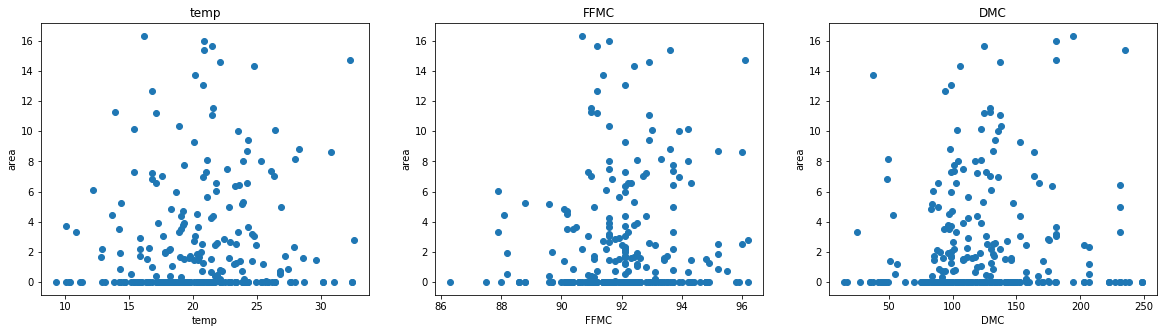

In [35]:
plt.figure(figsize=(20, 5))

features = ['temp', 'FFMC', 'DMC']
target = forest_iqr['area']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = forest_iqr[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('area')

# 7. Evaluating the model with selected features

## Preparing the data for training the model

In [36]:
X = pd.DataFrame(np.c_[forest_iqr['temp'], forest_iqr['FFMC'], forest_iqr['DMC']], columns = ['temp','FFMC', 'DMC'])
Y = forest_iqr['area']

## Splitting the data into training and testing sets

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(220, 3)
(56, 3)
(220,)
(56,)


## Training and testing the model

In [39]:
linear_model = LinearRegression()

## Model evaluation

### Entire data set with selected features

In [40]:
linear_model.fit(X, Y)

prediction = linear_model.predict(X)

rmse = np.sqrt(mean_squared_error(Y, prediction))

r2 = r2_score(Y, prediction)

print("The model performance for data set with selected features")
print("--------------------------------------")
print('RMSE is %.2f' % (rmse))
print('R2 score is %.2f' % (r2))

The model performance for data set with selected features
--------------------------------------
RMSE is 3.67
R2 score is 0.01


In [41]:
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### For training set

In [42]:
train_prediction = linear_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(Y_train, train_prediction))

r2 = r2_score(Y_train, train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is %.2f' % (rmse))
print('R2 score is %.2f' % (r2))

The model performance for training set
--------------------------------------
RMSE is 3.62
R2 score is 0.02


### For testing set

In [43]:
test_prediction = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, test_prediction))

r2 = r2_score(Y_test, test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is %.2f' % (rmse))
print('R2 score is %.2f' % (r2))

The model performance for testing set
--------------------------------------
RMSE is 3.89
R2 score is -0.05


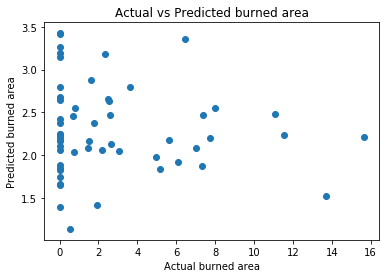

In [46]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual burned area")
plt.ylabel("Predicted burned area")
plt.title("Actual vs Predicted burned area")
plt.show()

# 8. The model

In [44]:
intercept = linear_model.intercept_
coefficients = linear_model.coef_

In [45]:
print('w0 = %.2f' % (intercept))

for i in range(1, len(coefficients)+1):
    print("w%i = %.2f" %(i, coefficients[i-1]))

w0 = -8.68
w1 = 0.04
w2 = 0.10
w3 = 0.01


$$area = -8.68 + 0.04temp + 0.10FFMC + 0.01DMC$$